In [1]:
import scipy as sp
from pylab import *
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.pylab as pylabㅌ
import pandas as pd
import seaborn as sns
import random


from InitializeSpeciesPool import *
from LV import *
from VariousMetrics import *

sns.set_style("ticks")

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}



session_name="results/test"


# 1. Infer k

In [2]:
no_buffered_ph = [6.8, 6.6, 5.8, 6.2, 6.4, 6.6, 6.7, 6.3, 6.2,
        6.3, 6.4, 6.6, 6.0, 6.0, 6.1, 5.8, 5.6, 5.4,
        6.0, 5.7, 5.8, 6.2, 6.4, 6.1, 5.7, 6.1, 5.7,
        6.0, 5.7, 5.8, 8.9, 6.8, 6.8, 6.7, 6.0, 5.7,
        6.3, 5.7, 5.8, 5.8, 6.2, 5.6, 5.9, 5.7, 6.2,
        6.4, 6.6, 6.5, 6.4, 6.5, 6.4, 6.0, 5.6, 5.8]
buffered_ph = [6.6, 6.6, 6.1, 6.5, 6.6, 6.7, 6.8, 6.4, 6.5,
                 6.4, 6.6, 6.7, 6.1, 6.3, 6.5, 6.3, 6.1, 6.1,
                 6.5, 6.2, 6.3, 6.6, 6.7, 6.2, 6.2, 6.5, 6.3,
                 6.6, 6.3, 6.4, 7.8, 6.6, 6.7, 6.6, 6.2, 6.1,
                 6.6, 6.1, 6.1, 6.1, 6.5, 6.1, 6.4, 6.2, 6.6,
                 6.7, 6.8, 6.6, 6.6, 6.6, 6.6, 6.3, 6.1, 6.3]
tenx_buffered_ph = [6.6, 6.6, 6.5, 6.6, 6.6, 6.6, 6.6, 6.6, 6.6,
                6.6, 6.6, 6.6, 6.5, 6.6, 6.6, 6.6, 6.5, 6.6,
                6.6, 6.6, 6.6, 6.6, 6.6, 6.5, 6.5, 6.6, 6.6,
                6.6, 6.6, 6.6, 6.8, 6.6, 6.6, 6.6, 6.5, 6.5,
                6.6, 6.6, 6.5, 6.5, 6.6, 6.5, 6.6, 6.5, 6.6,
                6.6, 6.6, 6.6, 6.6, 6.6, 6.6, 6.6, 6.5, 6.6]
buffered_ph_24 = [7.0, 5.0, 4.9, 6.9, 4.2, 5.5, 7.6, 3.3, 4.3,
                 4.5, 6.4, 6.9, 5.3, 4.9, 4.6, 4.9, 5.1, 3.8,
                 5.8, 4.6, 8.9, 8.5, 7.6, 9.0, 8.2, 7.3, 4.3,
                 6.4, 7.3, 6.0, 9.3, 7.2, 6.4, 5.9, 5.2, 4.4,
                 7.0, 5.2, 9.0, 9.1, 8.8, 6.3, 6.8, 5.6, 6.8,
                 7.6, 7.3, 5.4, 5.6, 6.8, 5.6, 5.1, 4.8, 4.0]



In [3]:
[6.5]*54

[6.5,
 6.5,
 6.5,
 6.5,
 6.5,
 6.5,
 6.5,
 6.5,
 6.5,
 6.5,
 6.5,
 6.5,
 6.5,
 6.5,
 6.5,
 6.5,
 6.5,
 6.5,
 6.5,
 6.5,
 6.5,
 6.5,
 6.5,
 6.5,
 6.5,
 6.5,
 6.5,
 6.5,
 6.5,
 6.5,
 6.5,
 6.5,
 6.5,
 6.5,
 6.5,
 6.5,
 6.5,
 6.5,
 6.5,
 6.5,
 6.5,
 6.5,
 6.5,
 6.5,
 6.5,
 6.5,
 6.5,
 6.5,
 6.5,
 6.5,
 6.5,
 6.5,
 6.5,
 6.5]

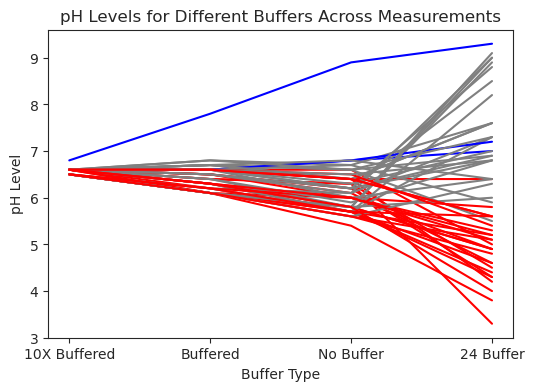

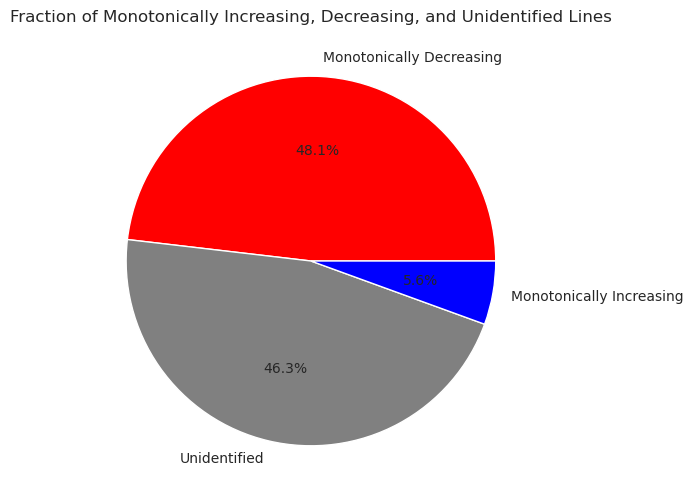

In [4]:
# Define the pH data
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

no_buffered_ph = [6.8, 6.6, 5.8, 6.2, 6.4, 6.6, 6.7, 6.3, 6.2, 6.3, 6.4, 6.6, 6.0, 6.0, 6.1, 5.8, 5.6, 5.4, 6.0, 5.7, 5.8, 6.2, 6.4, 6.1, 5.7, 6.1, 5.7, 6.0, 5.7, 5.8, 8.9, 6.8, 6.8, 6.7, 6.0, 5.7, 6.3, 5.7, 5.8, 5.8, 6.2, 5.6, 5.9, 5.7, 6.2, 6.4, 6.6, 6.5, 6.4, 6.5, 6.4, 6.0, 5.6, 5.8]
buffered_ph = [6.6, 6.6, 6.1, 6.5, 6.6, 6.7, 6.8, 6.4, 6.5, 6.4, 6.6, 6.7, 6.1, 6.3, 6.5, 6.3, 6.1, 6.1, 6.5, 6.2, 6.3, 6.6, 6.7, 6.2, 6.2, 6.5, 6.3, 6.6, 6.3, 6.4, 7.8, 6.6, 6.7, 6.6, 6.2, 6.1, 6.6, 6.1, 6.1, 6.1, 6.5, 6.1, 6.4, 6.2, 6.6, 6.7, 6.8, 6.6, 6.6, 6.6, 6.6, 6.3, 6.1, 6.3]
tenx_buffered_ph = [6.6, 6.6, 6.5, 6.6, 6.6, 6.6, 6.6, 6.6, 6.6, 6.6, 6.6, 6.6, 6.5, 6.6, 6.6, 6.6, 6.5, 6.6, 6.6, 6.6, 6.6, 6.6, 6.6, 6.5, 6.5, 6.6, 6.6, 6.6, 6.6, 6.6, 6.8, 6.6, 6.6, 6.6, 6.5, 6.5, 6.6, 6.6, 6.5, 6.5, 6.6, 6.5, 6.6, 6.5, 6.6, 6.6, 6.6, 6.6, 6.6, 6.6, 6.6, 6.6, 6.5, 6.6]
buffered_ph_24 = [7.0, 5.0, 4.9, 6.9, 4.2, 5.5, 7.6, 3.3, 4.3, 4.5, 6.4, 6.9, 5.3, 4.9, 4.6, 4.9, 5.1, 3.8, 5.8, 4.6, 8.9, 8.5, 7.6, 9.0, 8.2, 7.3, 4.3, 6.4, 7.3, 6.0, 9.3, 7.2, 6.4, 5.9, 5.2, 4.4, 7.0, 5.2, 9.0, 9.1, 8.8, 6.3, 6.8, 5.6, 6.8, 7.6, 7.3, 5.4, 5.6, 6.8, 5.6, 5.1, 4.8, 4.0]
reference_ph = [6.5]*54
length=54
# Create a dataset for each of the 48 measurements across the four buffer types with the specified order
data = {
    'Measurement': list(range(1, length + 1)),
    '10X Buffered': tenx_buffered_ph,
    'Buffered': buffered_ph,
    'No Buffer': no_buffered_ph,
    '24 Buffer': buffered_ph_24
}

def get_line_color(values):
    if all([x <= y for x, y in zip(values, values[1:])]):
        return 'blue'
    elif all([x >= y for x, y in zip(values, values[1:])]):
        return 'red'
    else:
        return 'grey'

df = pd.DataFrame(data)

colors = []
for i in range(len(df)):
    ph_values = df.iloc[i, 1:].values
    color = get_line_color(ph_values)
    colors.append(color)

# Plotting with the specified x-axis order
plt.figure(figsize=(6, 4))
for i in range(len(df)):
    ph_values = df.iloc[i, 1:].values
    color = colors[i]
    sns.lineplot(x=['10X Buffered', 'Buffered', 'No Buffer', '24 Buffer'], y=ph_values, color=color)

plt.title('pH Levels for Different Buffers Across Measurements')
plt.xlabel('Buffer Type')
plt.ylabel('pH Level')
plt.show()

color_counts = pd.Series(colors).value_counts(normalize=True) * 100
color_labels = {
    'blue': 'Monotonically Increasing',
    'red': 'Monotonically Decreasing',
    'grey': 'Unidentified'
}

color_counts.index = [color_labels[color] for color in color_counts.index]

color_counts.plot(kind='pie', colors=['red', 'grey', 'blue'], autopct='%1.1f%%', figsize=(8, 6))

plt.title('Fraction of Monotonically Increasing, Decreasing, and Unidentified Lines')
plt.ylabel('')
plt.show()


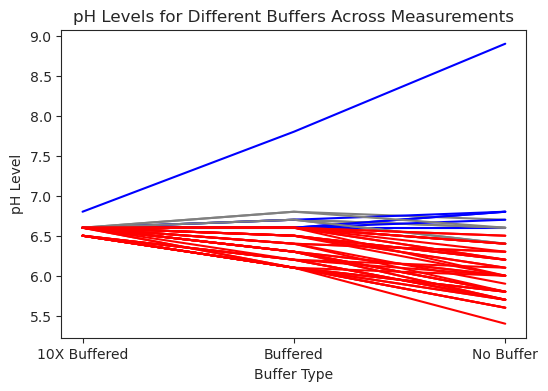

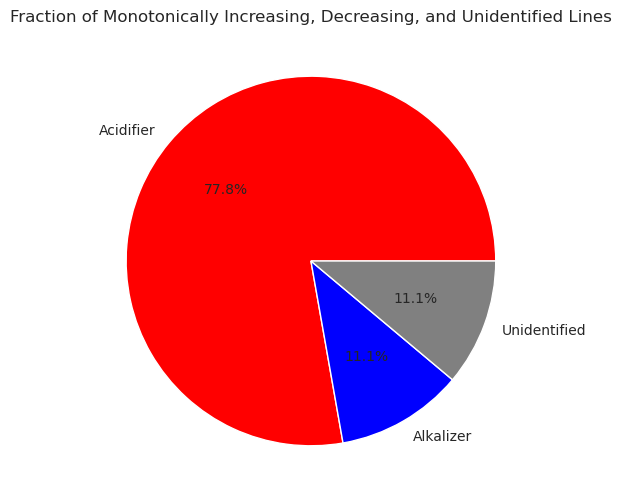

In [5]:
# Create a dataset for each of the 48 measurements across the three buffer types with the specified order
data = {
    'Measurement': list(range(1, length + 1)),
    '10X Buffered': tenx_buffered_ph,
    'Buffered': buffered_ph,
    'No Buffer': no_buffered_ph,
}

df = pd.DataFrame(data)

# Determine the color for each measurement based on monotonicity
def get_line_color(values):
    if all([x <= y for x, y in zip(values, values[1:])]):
        return 'blue'
    elif all([x >= y for x, y in zip(values, values[1:])]):
        return 'red'
    else:
        return 'grey'

colors = []
for i in range(len(df)):
    ph_values = df.iloc[i, 1:].values
    color = get_line_color(ph_values)
    colors.append(color)

# Plotting with the specified x-axis order
plt.figure(figsize=(6, 4))
for i in range(len(df)):
    ph_values = df.iloc[i, 1:].values
    color = colors[i]
    sns.lineplot(x=['10X Buffered', 'Buffered', 'No Buffer'], y=ph_values, color=color)

plt.title('pH Levels for Different Buffers Across Measurements')
plt.xlabel('Buffer Type')
plt.ylabel('pH Level')
plt.show()

color_counts = pd.Series(colors).value_counts(normalize=True) * 100
color_labels = {
    'blue': 'Alkalizer',
    'red': 'Acidifier',
    'grey': 'Unidentified'
}

color_counts.index = [color_labels[color] for color in color_counts.index]

color_counts.plot(kind='pie', colors=['red', 'blue', 'grey'], autopct='%1.1f%%', figsize=(8, 6))

plt.title('Fraction of Monotonically Increasing, Decreasing, and Unidentified Lines')
plt.ylabel('')
plt.show()

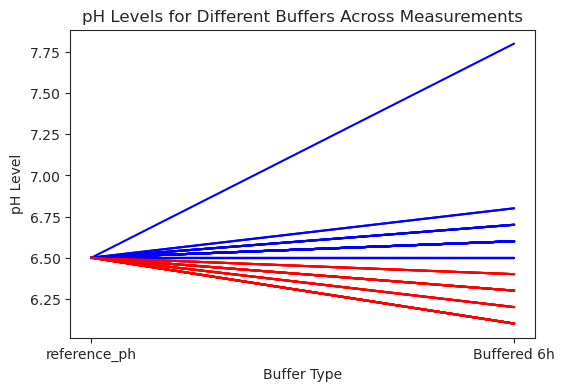

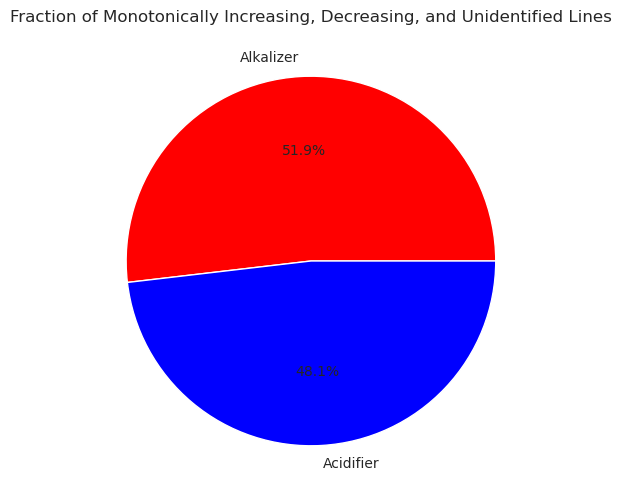

In [20]:
# Create a dataset for each of the 48 measurements across the three buffer types with the specified order
data = {
    'Measurement': list(range(1, length + 1)),
    'refernece_ph': reference_ph,
    'Buffered': buffered_ph,
}

df = pd.DataFrame(data)

# Determine the color for each measurement based on monotonicity
def get_line_color(values):
    if all([x <= y for x, y in zip(values, values[1:])]):
        return 'blue'
    elif all([x >= y for x, y in zip(values, values[1:])]):
        return 'red'
    else:
        return 'grey'

colors = []
slopes =[]
for i in range(len(df)):
    ph_values = df.iloc[i, 1:].values
    color = get_line_color(ph_values)
    colors.append(color)

# Plotting with the specified x-axis order
plt.figure(figsize=(6, 4))
for i in range(len(df)):
    ph_values = df.iloc[i, 1:].values
    color = colors[i]
    sns.lineplot(x=['reference_ph', 'Buffered 6h'], y=ph_values, color=color)

plt.title('pH Levels for Different Buffers Across Measurements')
plt.xlabel('Buffer Type')
plt.ylabel('pH Level')
plt.show()

color_counts = pd.Series(colors).value_counts(normalize=True) * 100
color_labels = {
    'blue': 'Alkalizer',
    'red': 'Acidifier',
    'grey': 'Unidentified'
}
color_counts.index = [color_labels[color] for color in color_counts.index]

color_counts.plot(kind='pie', colors=['red', 'blue', 'grey'], autopct='%1.1f%%', figsize=(8, 6))

plt.title('Fraction of Monotonically Increasing, Decreasing, and Unidentified Lines')
plt.ylabel('')
plt.show()

In [7]:
color_mapping = {'blue': 1, 'red': -1}
k_sign = np.array([color_mapping[color] for color in colors])
k_sign


array([ 1,  1, -1,  1,  1,  1,  1, -1,  1, -1,  1,  1, -1, -1,  1, -1, -1,
       -1,  1, -1, -1,  1,  1, -1, -1,  1, -1,  1, -1, -1,  1,  1,  1,  1,
       -1, -1,  1, -1, -1, -1,  1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,
       -1, -1, -1])

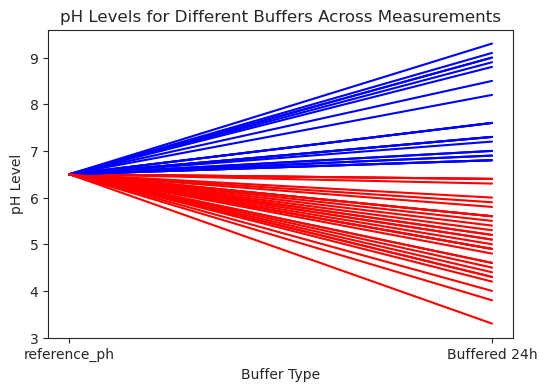

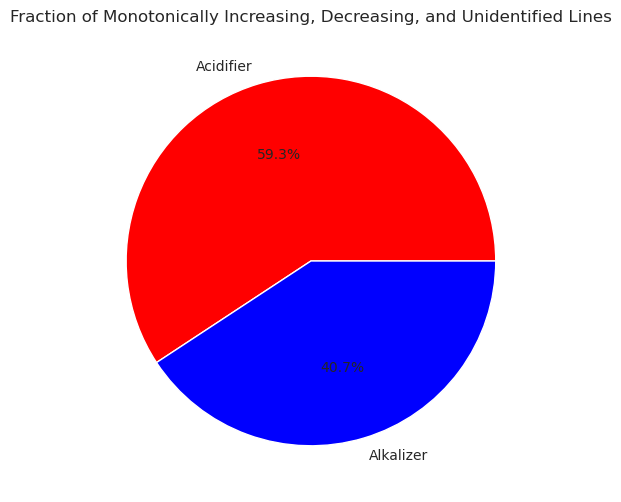

In [8]:
# Create a dataset for each of the 48 measurements across the three buffer types with the specified order
data = {
    'Measurement': list(range(1, length + 1)),
    'refernece_ph': reference_ph,
    'Buffered 24h': buffered_ph_24,
}

df = pd.DataFrame(data)

# Determine the color for each measurement based on monotonicity
def get_line_color(values):
    if all([x <= y for x, y in zip(values, values[1:])]):
        return 'blue'
    elif all([x >= y for x, y in zip(values, values[1:])]):
        return 'red'
    else:
        return 'grey'

colors = []
for i in range(len(df)):
    ph_values = df.iloc[i, 1:].values
    color = get_line_color(ph_values)
    colors.append(color)

# Plotting with the specified x-axis order
plt.figure(figsize=(6, 4))
for i in range(len(df)):
    ph_values = df.iloc[i, 1:].values
    color = colors[i]
    sns.lineplot(x=['reference_ph', 'Buffered 24h'], y=ph_values, color=color)

plt.title('pH Levels for Different Buffers Across Measurements')
plt.xlabel('Buffer Type')
plt.ylabel('pH Level')
plt.show()

color_counts = pd.Series(colors).value_counts(normalize=True) * 100
color_labels = {
    'blue': 'Alkalizer',
    'red': 'Acidifier',
    'grey': 'Unidentified'
}

color_counts.index = [color_labels[color] for color in color_counts.index]

color_counts.plot(kind='pie', colors=['red', 'blue', 'grey'], autopct='%1.1f%%', figsize=(8, 6))

plt.title('Fraction of Monotonically Increasing, Decreasing, and Unidentified Lines')
plt.ylabel('')
plt.show()

# 2. Infer g

In [24]:
# Generate file paths for pH values from 3.5 to 9.5
ph_values = [str(round(x, 1)) for x in np.arange(3.5, 10, 1)]

file_paths = {ph: f'Jiliang_data/pH{ph}.xlsx' for ph in ph_values}

# Function to read the specific range from an Excel file and return a 2D numpy array
def read_od_readings(file_path):
    df = pd.read_excel(file_path, sheet_name=0, header=None, usecols='B:J', skiprows=26, nrows=6)
    return df.to_numpy()

# Read and store the OD readings for each file
od_readings = {ph: read_od_readings(path) for ph, path in file_paths.items()}

# Display the OD readings
for ph, readings in od_readings.items():
    print(f"pH {ph}:\n{readings}\n")

pH 3.5:
[[0.045  0.0499 0.0474 0.0463 0.046  0.0458 0.0464 0.0461 0.0465]
 [0.047  0.0464 0.0465 0.0459 0.0463 0.0462 0.0469 0.0464 0.0464]
 [0.0473 0.0467 0.0472 0.0463 0.0465 0.0467 0.0472 0.0466 0.0464]
 [0.0461 0.0467 0.0463 0.0461 0.0464 0.0459 0.0474 0.0462 0.0471]
 [0.0455 0.0468 0.0473 0.047  0.0469 0.0471 0.0473 0.0462 0.0473]
 [0.0456 0.0453 0.0452 0.0471 0.0462 0.0457 0.0451 0.0453 0.0487]]

pH 4.5:
[[0.0454     0.14040001 0.51810002 0.1023     0.1098     0.059
  0.43849999 0.1239     0.1459    ]
 [0.14390001 0.0469     0.0472     0.0478     0.71079999 0.1171
  0.43419999 0.39669999 0.1031    ]
 [0.0462     0.0891     0.95990002 0.0478     0.0482     0.78299999
  0.3624     0.0474     0.33840001]
 [0.0464     0.37689999 0.2112     0.19       0.4513     0.142
  0.1372     0.52999997 0.23100001]
 [0.3003     0.107      0.93199998 0.89160001 0.0483     0.0978
  0.0473     0.0486     0.2006    ]
 [0.322      0.0462     0.12980001 0.33489999 0.0474     0.0461
  0.3154     0.16329

In [23]:
od_readings.keys()

dict_keys(['HN_10Xbuffer_6h', 'HN_no_buffer_6h', 'HN_normal_buffer_6h', 'HN_normal_buffer_24h'])

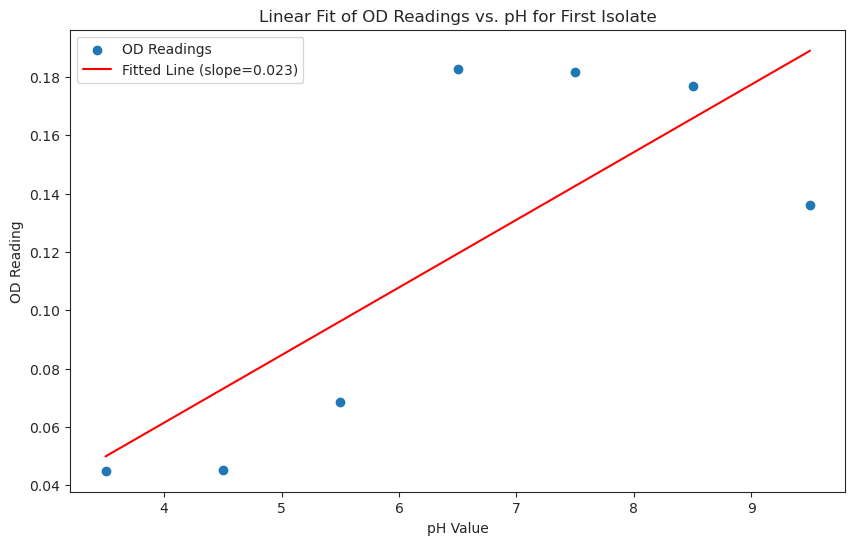

(0.02317857050469943,
 -0.031232136434742347,
 0.7754506636159008,
 0.04049354347255168,
 0.008440295780804425)

In [25]:
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np

# Convert pH values to numeric form for plotting
ph_values = ['3.5', '4.5', '5.5', '6.5', '7.5', '8.5', '9.5']
ph_numeric = np.array([float(ph) for ph in ph_values])

# Extract the OD readings for the first isolate ([0,0]) across all pH values
od_values_first_isolate = np.array([od_readings[ph][0, 0] for ph in ph_values])

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(ph_numeric, od_values_first_isolate)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(ph_numeric, od_values_first_isolate, label='OD Readings')
plt.plot(ph_numeric, intercept + slope * ph_numeric, 'r', label=f'Fitted Line (slope={slope:.3f})')
plt.xlabel('pH Value')
plt.ylabel('OD Reading')
plt.title('Linear Fit of OD Readings vs. pH for First Isolate')
plt.legend()
plt.show()

slope, intercept, r_value, p_value, std_err

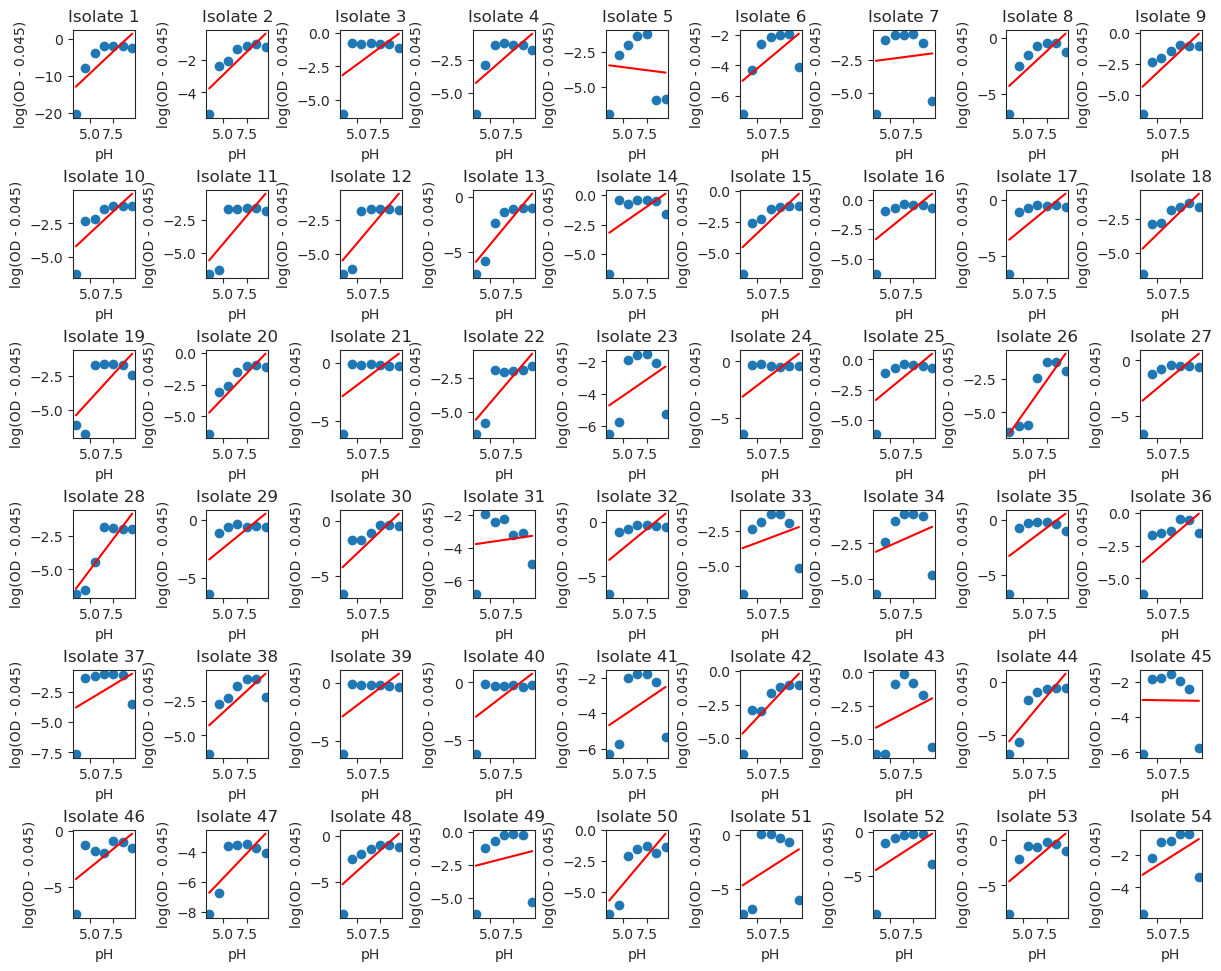

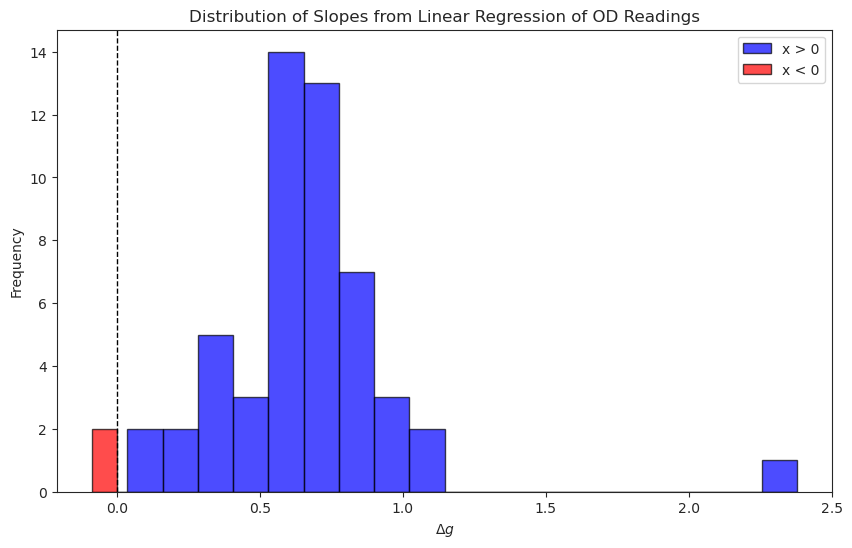

In [37]:
# Convert pH values to numeric form for plotting
ph_values = ['3.5', '4.5', '5.5', '6.5', '7.5', '8.5', '9.5']
ph_numeric = np.array([float(ph) for ph in ph_values])

# Initialize a dictionary to store the regression results
regression_results = {}

# Create subplots
fig, axs = plt.subplots(6, 9, figsize=(12, 12*0.8), constrained_layout=True)

# Plot for each isolate
for isolate in range(54):
    od_values_isolate = np.array([od_readings[ph][isolate // 9, isolate % 9] for ph in ph_values])
    
    # Apply the transformation log(x-0.045) to the OD values, filtering out invalid values
    filtered_ph_numeric = []
    filtered_log_od_values = []
    for ph, od in zip(ph_numeric, od_values_isolate):
        if od > 0.045:
            filtered_ph_numeric.append(ph)
            filtered_log_od_values.append(np.log(od - 0.045))
    
    if len(filtered_ph_numeric) < 2:  # Skip if not enough points for regression
        continue

    filtered_ph_numeric = np.array(filtered_ph_numeric)
    filtered_log_od_values = np.array(filtered_log_od_values)
    
    # Perform linear regression on the transformed values
    slope, intercept, r_value, p_value, std_err = linregress(filtered_ph_numeric, filtered_log_od_values)
    
    # Store the regression results
    regression_results[isolate] = {
        'slope': slope,
        'intercept': intercept,
        'r_value': r_value,
        'p_value': p_value,
        'std_err': std_err
    }
    
    # Determine subplot location
    row = isolate // 9
    col = isolate % 9
    
    # Plotting the results
    ax = axs[row, col]
    ax.scatter(filtered_ph_numeric, filtered_log_od_values, label='Transformed OD Readings')
    ax.plot(filtered_ph_numeric, intercept + slope * filtered_ph_numeric, 'r', label=f'Fitted Line (slope={slope:.3f})')
    ax.set_title(f'Isolate {isolate + 1}')
    ax.set_xlabel('pH')
    ax.set_ylabel('log(OD - 0.045)')

plt.show()

regression_results
# Extract slopes from the regression results
slopes = np.array([result['slope'] for result in regression_results.values()])


# Determine the bins, ensuring x=0 is included
bins = np.histogram_bin_edges(slopes, bins=20)
# Ensure 0 is included in the bins
if 0 not in bins:
    bins = np.sort(np.append(bins, 0))

# Split the data into positive and negative slopes
positive_slopes = slopes[slopes >= 0]
negative_slopes = slopes[slopes < 0]

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(positive_slopes, bins=bins, edgecolor='black', color='blue', alpha=0.7, label='x > 0')
plt.hist(negative_slopes, bins=bins, edgecolor='black', color='red', alpha=0.7, label='x < 0')
plt.axvline(x=0, color='black', linestyle='--', linewidth=1)  # Auxiliary line at x=0
plt.xlabel(r'$\Delta g$')
plt.ylabel('Frequency')
plt.title('Distribution of Slopes from Linear Regression of OD Readings')
plt.legend()

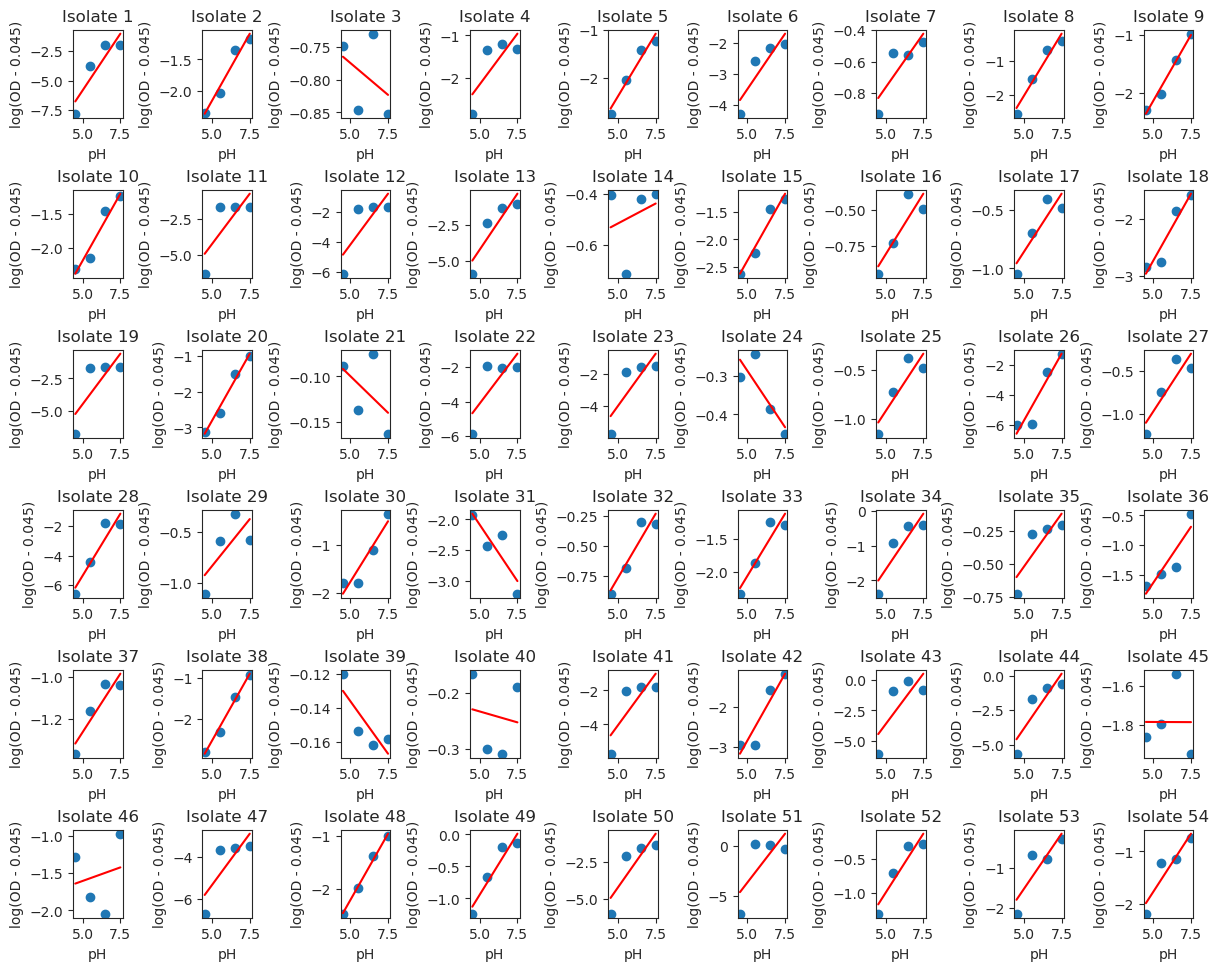

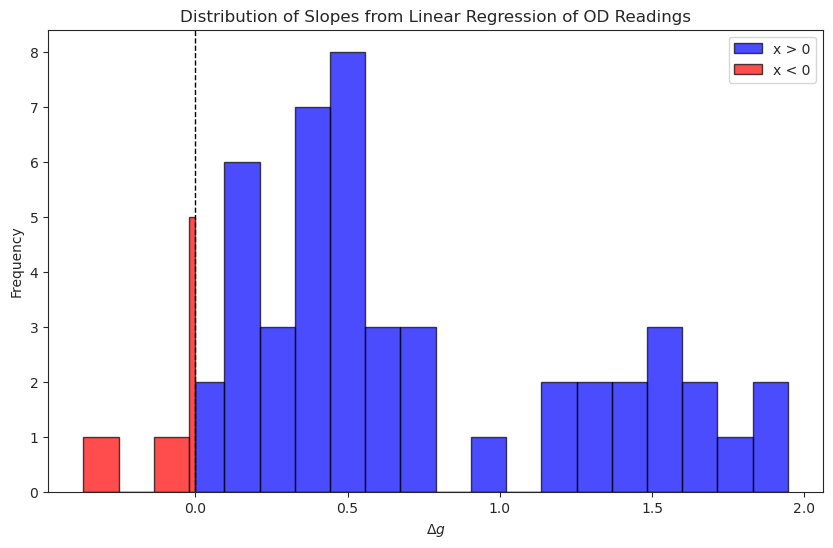

In [38]:
# Convert pH values to numeric form for plotting
ph_values = ['4.5', '5.5', '6.5', '7.5']
ph_numeric = np.array([float(ph) for ph in ph_values])

# Initialize a dictionary to store the regression results
regression_results = {}

# Create subplots
fig, axs = plt.subplots(6, 9, figsize=(12, 12*0.8), constrained_layout=True)

# Plot for each isolate
for isolate in range(54):
    od_values_isolate = np.array([od_readings[ph][isolate // 9, isolate % 9] for ph in ph_values])
    
    # Apply the transformation log(x-0.045) to the OD values, filtering out invalid values
    filtered_ph_numeric = []
    filtered_log_od_values = []
    for ph, od in zip(ph_numeric, od_values_isolate):
        if od > 0.045:
            filtered_ph_numeric.append(ph)
            filtered_log_od_values.append(np.log(od - 0.045))
    
    if len(filtered_ph_numeric) < 2:  # Skip if not enough points for regression
        continue

    filtered_ph_numeric = np.array(filtered_ph_numeric)
    filtered_log_od_values = np.array(filtered_log_od_values)
    
    # Perform linear regression on the transformed values
    slope, intercept, r_value, p_value, std_err = linregress(filtered_ph_numeric, filtered_log_od_values)
    
    # Store the regression results
    regression_results[isolate] = {
        'slope': slope,
        'intercept': intercept,
        'r_value': r_value,
        'p_value': p_value,
        'std_err': std_err
    }
    
    # Determine subplot location
    row = isolate // 9
    col = isolate % 9
    
    # Plotting the results
    ax = axs[row, col]
    ax.scatter(filtered_ph_numeric, filtered_log_od_values, label='Transformed OD Readings')
    ax.plot(filtered_ph_numeric, intercept + slope * filtered_ph_numeric, 'r', label=f'Fitted Line (slope={slope:.3f})')
    ax.set_title(f'Isolate {isolate + 1}')
    ax.set_xlabel('pH')
    ax.set_ylabel('log(OD - 0.045)')

plt.show()

regression_results
# Extract slopes from the regression results
slopes = np.array([result['slope'] for result in regression_results.values()])


# Determine the bins, ensuring x=0 is included
bins = np.histogram_bin_edges(slopes, bins=20)
# Ensure 0 is included in the bins
if 0 not in bins:
    bins = np.sort(np.append(bins, 0))

# Split the data into positive and negative slopes
positive_slopes = slopes[slopes >= 0]
negative_slopes = slopes[slopes < 0]

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(positive_slopes, bins=bins, edgecolor='black', color='blue', alpha=0.7, label='x > 0')
plt.hist(negative_slopes, bins=bins, edgecolor='black', color='red', alpha=0.7, label='x < 0')
plt.axvline(x=0, color='black', linestyle='--', linewidth=1)  # Auxiliary line at x=0
plt.xlabel(r'$\Delta g$')
plt.ylabel('Frequency')
plt.title('Distribution of Slopes from Linear Regression of OD Readings')
plt.legend()

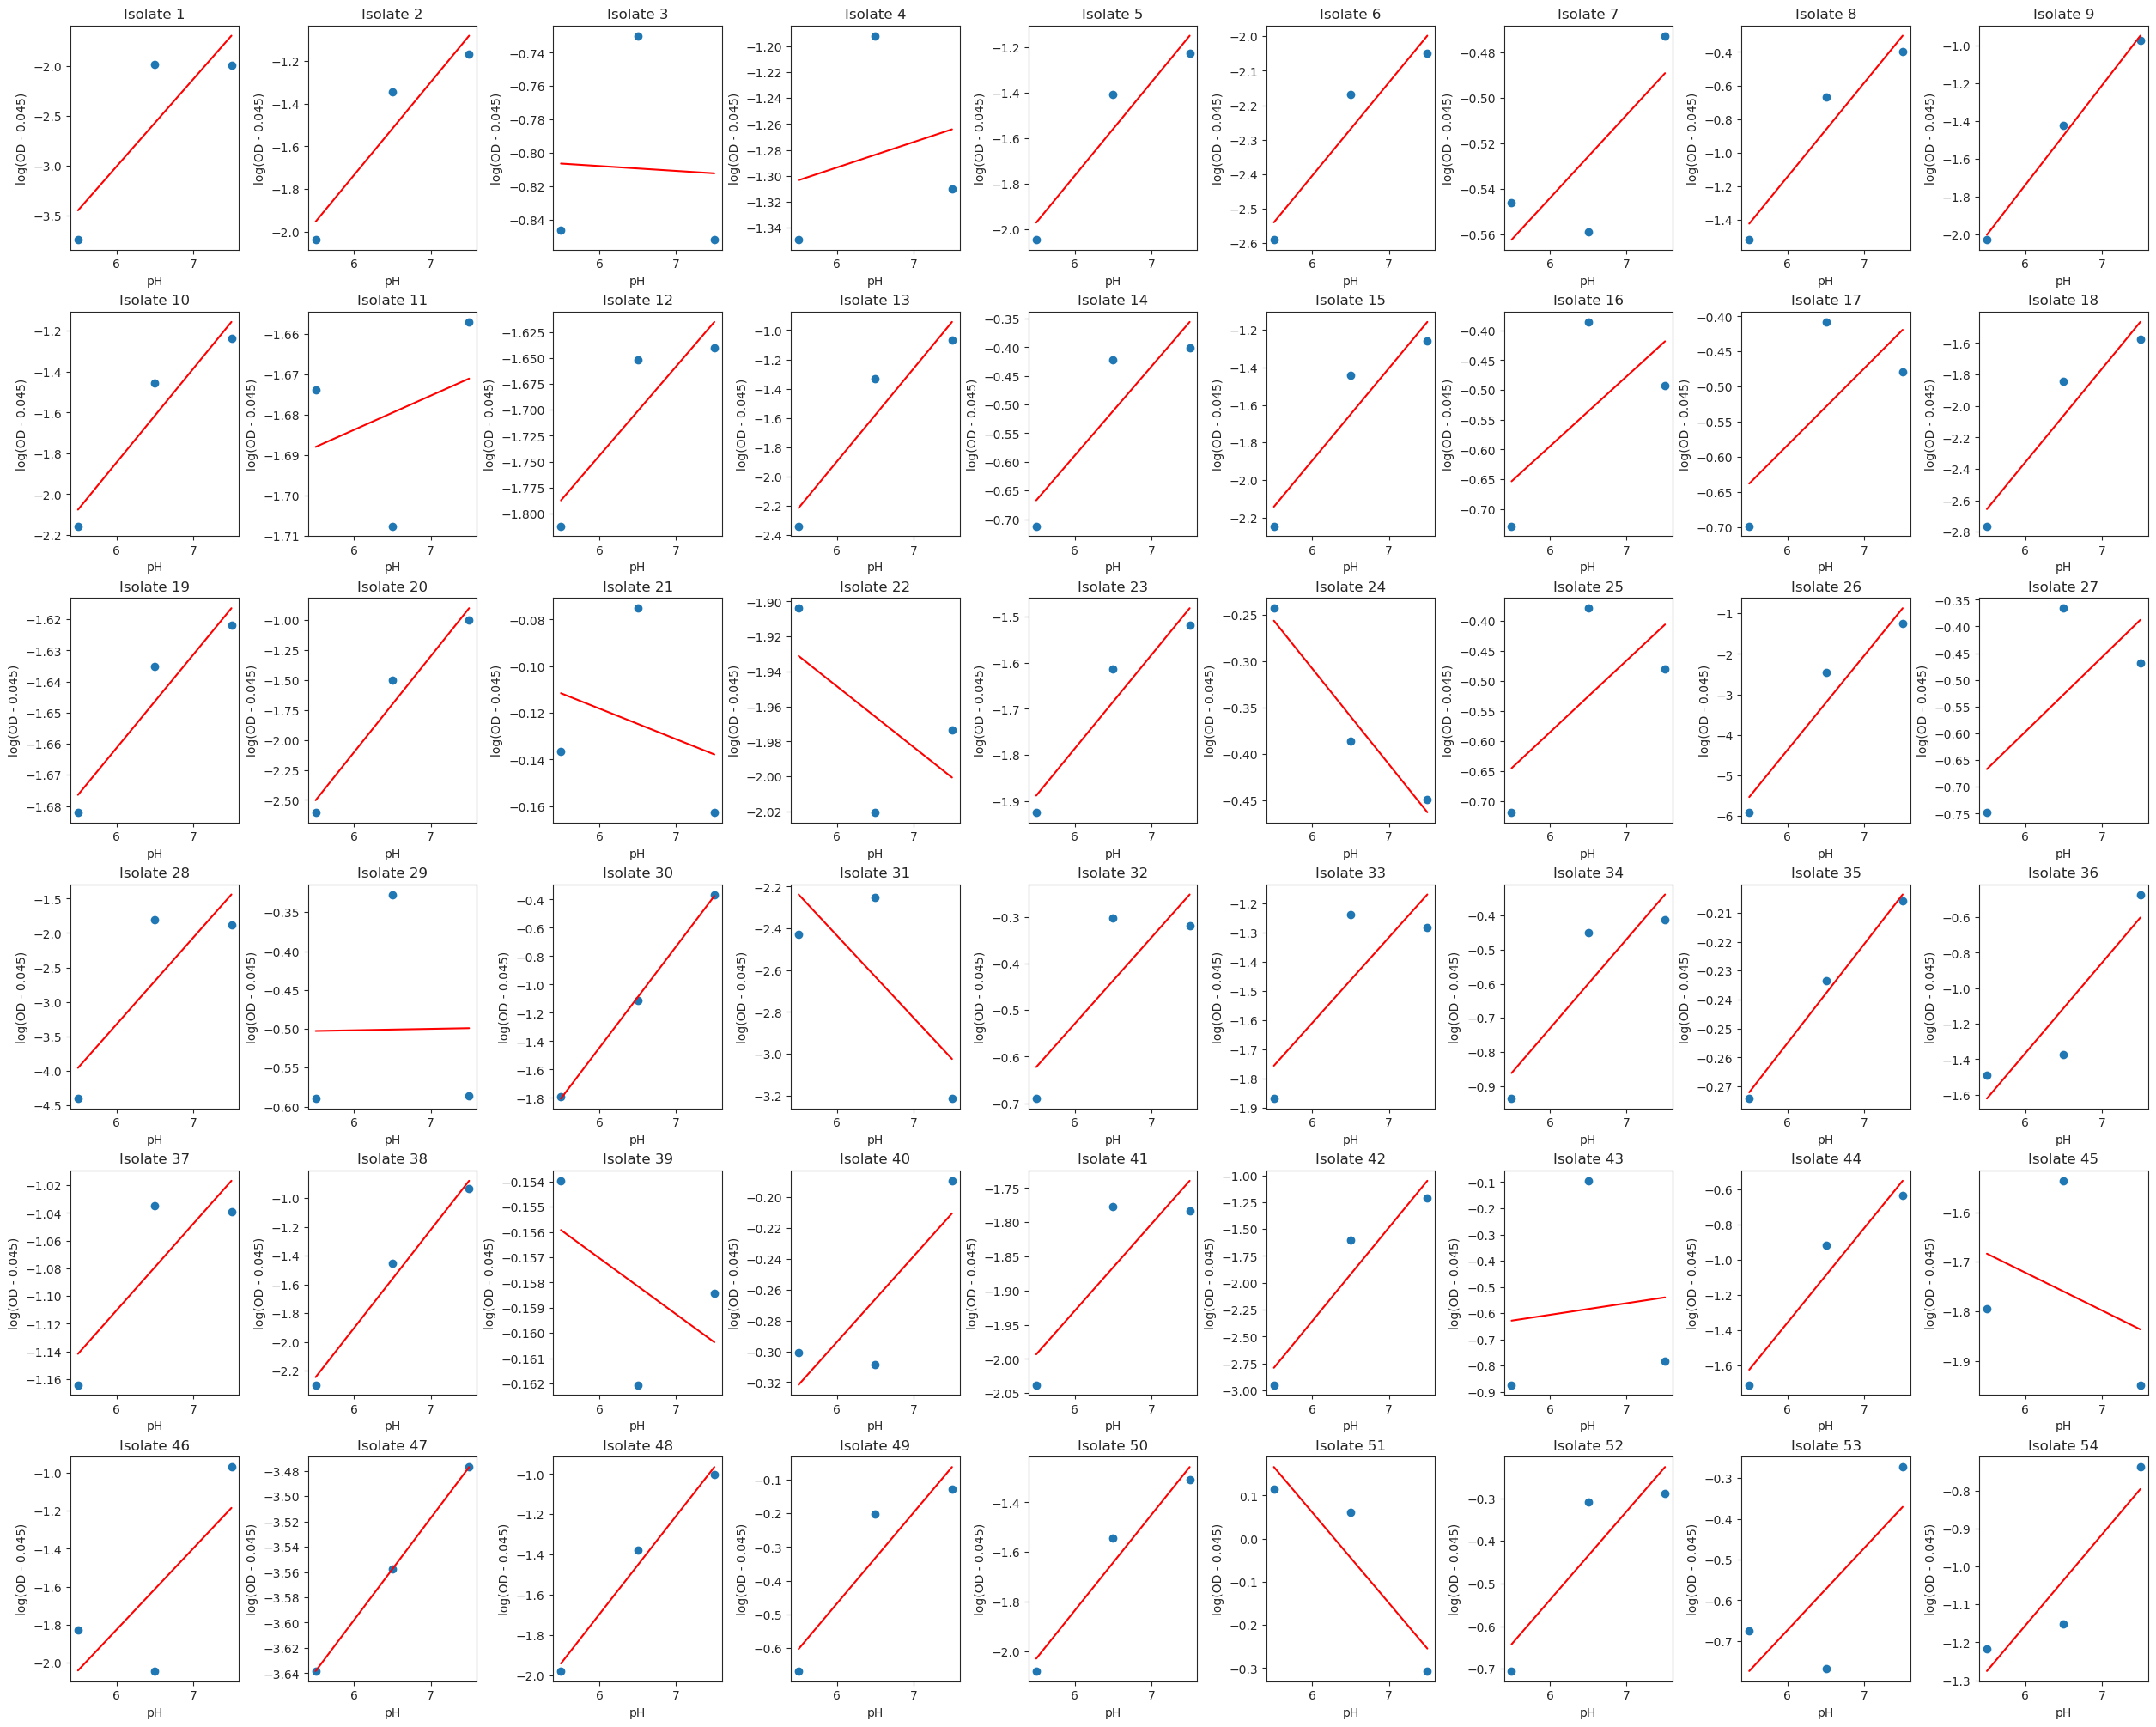

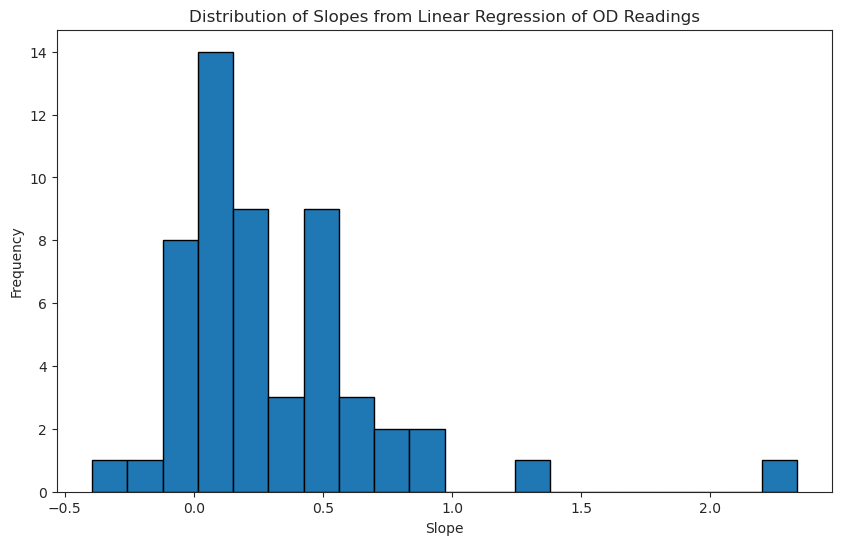

In [14]:
# Convert pH values to numeric form for plotting
ph_values = ['5.5', '6.5', '7.5']
ph_numeric = np.array([float(ph) for ph in ph_values])

# Initialize a dictionary to store the regression results
regression_results = {}

# Create subplots
fig, axs = plt.subplots(6, 9, figsize=(25, 20), constrained_layout=True)

# Plot for each isolate
for isolate in range(54):
    od_values_isolate = np.array([od_readings[ph][isolate // 9, isolate % 9] for ph in ph_values])
    
    # Apply the transformation log(x-0.045) to the OD values, filtering out invalid values
    filtered_ph_numeric = []
    filtered_log_od_values = []
    for ph, od in zip(ph_numeric, od_values_isolate):
        if od > 0.045:
            filtered_ph_numeric.append(ph)
            filtered_log_od_values.append(np.log(od - 0.045))
    
    if len(filtered_ph_numeric) < 2:  # Skip if not enough points for regression
        continue

    filtered_ph_numeric = np.array(filtered_ph_numeric)
    filtered_log_od_values = np.array(filtered_log_od_values)
    
    # Perform linear regression on the transformed values
    slope, intercept, r_value, p_value, std_err = linregress(filtered_ph_numeric, filtered_log_od_values)
    
    # Store the regression results
    regression_results[isolate] = {
        'slope': slope,
        'intercept': intercept,
        'r_value': r_value,
        'p_value': p_value,
        'std_err': std_err
    }
    
    # Determine subplot location
    row = isolate // 9
    col = isolate % 9
    
    # Plotting the results
    ax = axs[row, col]
    ax.scatter(filtered_ph_numeric, filtered_log_od_values, label='Transformed OD Readings')
    ax.plot(filtered_ph_numeric, intercept + slope * filtered_ph_numeric, 'r', label=f'Fitted Line (slope={slope:.3f})')
    ax.set_title(f'Isolate {isolate + 1}')
    ax.set_xlabel('pH')
    ax.set_ylabel('log(OD - 0.045)')

plt.show()

regression_results
# Extract slopes from the regression results
slopes = [result['slope'] for result in regression_results.values()]

# Plot the distribution of slopes
plt.figure(figsize=(10, 6))
plt.hist(slopes, bins=20, edgecolor='black')
plt.xlabel('Slope')
plt.ylabel('Frequency')
plt.title('Distribution of Slopes from Linear Regression of OD Readings')
plt.show()

# 3.Infer g vs k

In [15]:
k_sign


array([ 1,  1, -1,  1,  1,  1,  1, -1,  1, -1,  1,  1, -1, -1,  1, -1, -1,
       -1,  1, -1, -1,  1,  1, -1, -1,  1, -1,  1, -1, -1,  1,  1,  1,  1,
       -1, -1,  1, -1, -1, -1,  1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,
       -1, -1, -1])

In [39]:
import numpy as np
import pandas as pd

# Provided file paths
file_paths = {
    'HN_10Xbuffer_6h': '/home/gridsan/jsong/Ecology_Codes/pHmodel_ForJiliang/Jiliang_data/HN_10Xbuffer 6h.xlsx',
    'HN_no_buffer_6h': '/home/gridsan/jsong/Ecology_Codes/pHmodel_ForJiliang/Jiliang_data/HN_no buffer 6h.xlsx',
    'HN_normal_buffer_6h': '/home/gridsan/jsong/Ecology_Codes/pHmodel_ForJiliang/Jiliang_data/HN_normal buffer 6h.xlsx',
    'HN_normal_buffer_24h': '/home/gridsan/jsong/Ecology_Codes/pHmodel_ForJiliang/Jiliang_data/HN_normal buffer 24h.xlsx'
}

# Function to read the specific range from an Excel file and return a 2D numpy array
def read_od_readings(file_path):
    df = pd.read_excel(file_path, sheet_name=0, header=None, usecols='B:J', skiprows=26, nrows=6)
    return df.to_numpy()

# Read and store the OD readings for each file
od_readings = {key: read_od_readings(path) for key, path in file_paths.items()}

# Display the OD readings
for key, readings in od_readings.items():
    print(f"{key}:\n{readings}\n")


HN_10Xbuffer_6h:
[[0.0621 0.0735 0.1212 0.0526 0.0485 0.0585 0.0508 0.0928 0.0864]
 [0.0893 0.0517 0.0477 0.142  0.1016 0.0594 0.0961 0.1017 0.0817]
 [0.0839 0.0878 0.0907 0.0552 0.0495 0.0748 0.091  0.047  0.1034]
 [0.048  0.1136 0.0842 0.0673 0.0966 0.0481 0.0739 0.1021 0.0928]
 [0.0766 0.1131 0.1304 0.1122 0.0489 0.0852 0.0519 0.0681 0.0525]
 [0.07   0.0471 0.0619 0.0726 0.0481 0.0507 0.0976 0.1076 0.0792]]

HN_no_buffer_6h:
[[0.0703 0.0794 0.0787 0.0542 0.0472 0.0522 0.0538 0.0911 0.0953]
 [0.0904 0.0564 0.0481 0.1114 0.0861 0.059  0.0948 0.0983 0.0818]
 [0.0889 0.0788 0.0959 0.0589 0.0494 0.1336 0.0995 0.0472 0.104 ]
 [0.051  0.1071 0.09   0.061  0.1064 0.0494 0.0665 0.0831 0.0754]
 [0.0916 0.1034 0.1267 0.107  0.0499 0.0855 0.0524 0.0812 0.0535]
 [0.0837 0.0544 0.0604 0.0647 0.0497 0.0488 0.0921 0.0969 0.0839]]

HN_normal_buffer_6h:
[[0.0677     0.0814     0.1128     0.0532     0.0485     0.0534
  0.0652     0.0954     0.0876    ]
 [0.0915     0.0556     0.0481     0.1362     0.0

In [40]:
# Extracting the specific OD readings for comparison
od_readings_normal_buffer_6h = od_readings['HN_normal_buffer_6h'].flatten()
od_readings_10Xbuffer_6h = od_readings['HN_10Xbuffer_6h'].flatten()

# Calculating the difference
difference = od_readings_normal_buffer_6h - od_readings_10Xbuffer_6h
k_slopes=np.array(buffered_ph)-6.5


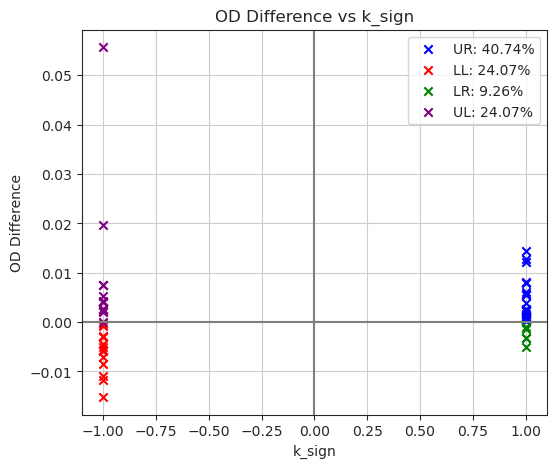

Upper Right: 40.74%
Lower Left: 24.07%
Lower Right: 9.26%
Upper Left: 24.07%


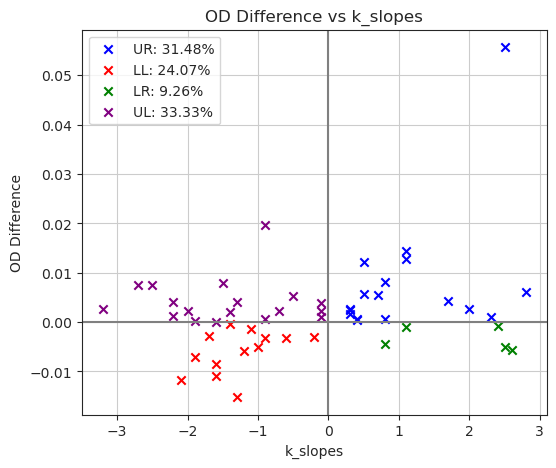

Upper Right: 31.48%
Lower Left: 24.07%
Lower Right: 9.26%
Upper Left: 33.33%


In [47]:
# Function to calculate fractions and plot
def plot_quadrants(x, y, xlabel, ylabel, title):
    # Calculate fractions
    upper_right = np.sum((x > 0) & (y > 0)) / len(x) * 100
    lower_left = np.sum((x < 0) & (y < 0)) / len(x) * 100
    lower_right = np.sum((x > 0) & (y < 0)) / len(x) * 100
    upper_left = np.sum((x < 0) & (y > 0)) / len(x) * 100
    
    # Plot the data
    plt.figure(figsize=(6, 5))
    plt.scatter(x[(x > 0) & (y > 0)], y[(x > 0) & (y > 0)], color='blue', marker='x', label=f'UR: {upper_right:.2f}%')
    plt.scatter(x[(x < 0) & (y < 0)], y[(x < 0) & (y < 0)], color='red', marker='x', label=f'LL: {lower_left:.2f}%')
    plt.scatter(x[(x > 0) & (y < 0)], y[(x > 0) & (y < 0)], color='green', marker='x', label=f'LR: {lower_right:.2f}%')
    plt.scatter(x[(x < 0) & (y > 0)], y[(x < 0) & (y > 0)], color='purple', marker='x', label=f'UL: {upper_left:.2f}%')
    
    plt.axhline(0, color='gray', linewidth=1.5)
    plt.axvline(0, color='gray', linewidth=1.5)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.legend()
    plt.show()
    
    # Print fractions
    print(f'Upper Right: {upper_right:.2f}%')
    print(f'Lower Left: {lower_left:.2f}%')
    print(f'Lower Right: {lower_right:.2f}%')
    print(f'Upper Left: {upper_left:.2f}%')

# Plotting the OD difference vs k_sign with detailed labels and titles
plot_quadrants(k_sign, difference, 'k_sign', 'OD Difference', 'OD Difference vs k_sign')

# Plotting the OD difference vs k_slopes with detailed labels and titles
plot_quadrants(k_slopes, difference, 'k_slopes', 'OD Difference', 'OD Difference vs k_slopes')

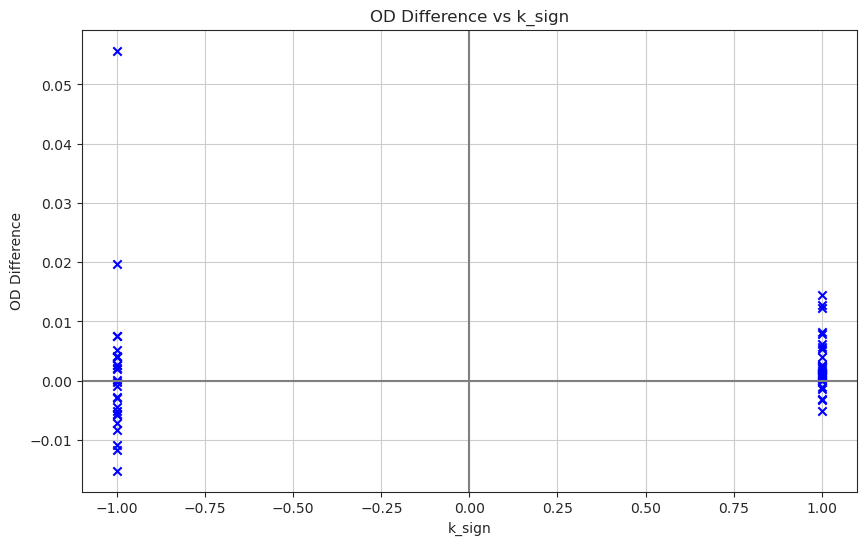

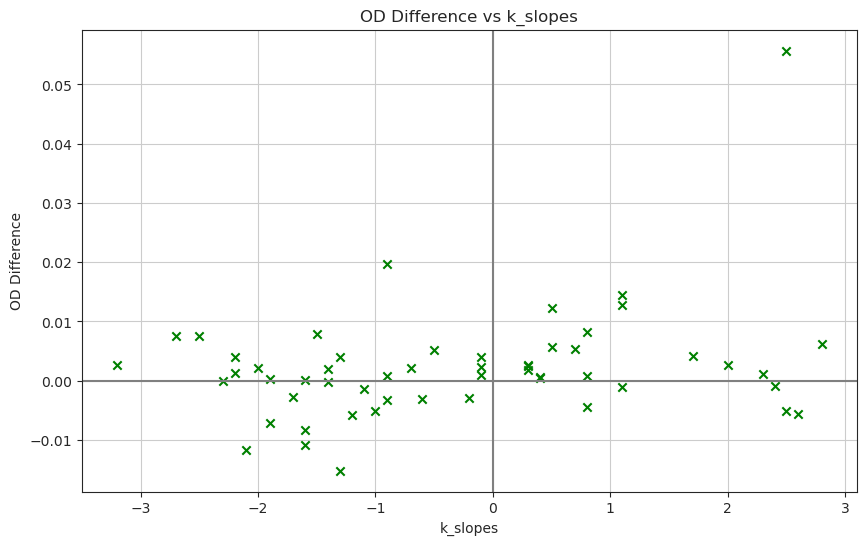

In [42]:
# Extracting the specific OD readings for comparison
od_readings_normal_buffer_6h = od_readings['HN_normal_buffer_6h'].flatten()
od_readings_10Xbuffer_6h = od_readings['HN_10Xbuffer_6h'].flatten()

# Calculating the difference
difference = od_readings_normal_buffer_6h - od_readings_10Xbuffer_6h
k_slopes=np.array(buffered_ph_24)-6.5


# Plotting the OD difference vs k_sign with detailed labels and titles
plt.figure(figsize=(10, 6))
plt.scatter(k_sign, difference, color='blue', marker='x')
plt.axhline(0, color='gray', linewidth=1.5)
plt.axvline(0, color='gray', linewidth=1.5)
plt.title('OD Difference vs k_sign')
plt.xlabel('k_sign')
plt.ylabel('OD Difference')
plt.grid(True)
plt.show()

# Plotting the OD difference vs k_slopes with detailed labels and titles
plt.figure(figsize=(10, 6))
plt.scatter(k_slopes, difference, color='green', marker='x')
plt.axhline(0, color='gray', linewidth=1.5)
plt.axvline(0, color='gray', linewidth=1.5)
plt.title('OD Difference vs k_slopes')
plt.xlabel('k_slopes')
plt.ylabel('OD Difference')
plt.grid(True)
plt.show()